In [14]:
# Ingestion script header ################################################

library(googledrive)
drive_auth()

# source("./Scripts/template_fxns.R") # RStudio
source("./template_fxns.R") # Jupyter

## data://
datapath.id <- as_id("1hOHLPmvDvycpnxNYOMgIV5Z6uVcoSyuq")

## proxy data://
# proxydata.path <- file.path(".", "Data") # For RStudio
proxydata.path <- file.path("..", "Data") # For Jupyter

## Get IDs of raw data file dump and Data stage
rawdump.id <- drive_sub_id(datapath.id, "raw")
datastage.id <- drive_sub_id(datapath.id, "data")

#************************************************************************#

Waiting for authentication in browser...
Press Esc/Ctrl + C to abort
Please point your browser to the following url: 
https://accounts.google.com/o/oauth2/auth?client_id=603366585132-nku3fbd298ma3925l12o2hq0cc1v8u11.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&redirect_uri=http%3A%2F%2Flocalhost%3A1410%2F&response_type=code&state=MmIMNtj7ta
Authentication complete.


# Get data

In [3]:
(data.files <- as_id(datastage.id) %>% drive_ls_from_id())

name,id,drive_resource


## `data00_raw ingest.rds`

### Download

In [4]:
cache.file <- "data00_raw ingest.rds"
cachefile.id <- drive_sub_id(datastage.id, cache.file) # Get GDrive ID
cachefile.path <- file.path(proxydata.path, cache.file) # Set proxy data:// path
drive_download(as_id(cachefile.id), path = cachefile.path, overwrite = TRUE)

File downloaded:
  * data00_raw ingest.rds
Saved locally as:
  * ../Data/data00_raw ingest.rds


### Load

In [5]:
hr.raw <- readRDS(cachefile.path)
str(hr.raw)

Classes 'tbl_df', 'tbl' and 'data.frame':	1470 obs. of  32 variables:
 $ Age                     : num  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Rarely",..: 2 3 2 3 2 3 2 2 3 2 ...
 $ DailyRate               : num  1102 279 1373 1392 591 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : num  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : Factor w/ 5 levels "Below College",..: 2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeNumber          : chr  "0001" "0002" "0004" "0005" ...
 $ EnvironmentSatisfaction : Factor w/ 4 levels "Low","Medium",..: 2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ HourlyRate              : num

# Clean data

In [17]:
hr.df <- hr.raw # Create canvas for wrangling

## Inspect missingness

In [18]:
sapply(hr.df, countNA)

Age                Attrition           BusinessTravel 
                       0                        0                        0 
               DailyRate               Department         DistanceFromHome 
                       0                        0                        0 
               Education           EducationField           EmployeeNumber 
                       0                        0                        0 
 EnvironmentSatisfaction                   Gender               HourlyRate 
                       0                        0                        0 
          JobInvolvement                 JobLevel                  JobRole 
                       0                        0                        0 
         JobSatisfaction            MaritalStatus            MonthlyIncome 
                       0                        0                        0 
             MonthlyRate       NumCompaniesWorked                 OverTime 
                       0                        0                        0 
       PercentSalaryHike        PerformanceRating RelationshipSatisfaction 
                       0                        0                        0 
        StockOptionLevel        TotalWorkingYears    TrainingTimesLastYear 
                       0                        0                        0 
         WorkLifeBalance           YearsAtCompany       YearsInCurrentRole 
                       0                        0                        0 
 YearsSinceLastPromotion     YearsWithCurrManager 
                       0                        0

No `NA` values.

## Check key *EmployeeNumber* validity

In [19]:
hr.df %>% group_by(EmployeeNumber) %>% summarise(nrow = n()) %>% arrange(desc(nrow))

EmployeeNumber,nrow
0001,1
0002,1
0004,1
0005,1
0007,1
0008,1
0010,1
0011,1
0012,1
0013,1


There is no duplicate key since first *nrow* entry is `1`.

In [20]:
# Confirm no dup key
hr.df %>% group_by(EmployeeNumber) %>% summarise(nrow = n()) %>% filter(nrow > 1)

EmployeeNumber,nrow


Confirmed no dup key.

## Disambiguate columns

In [21]:
str(hr.df)

Classes 'tbl_df', 'tbl' and 'data.frame':	1470 obs. of  32 variables:
 $ Age                     : num  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Rarely",..: 2 3 2 3 2 3 2 2 3 2 ...
 $ DailyRate               : num  1102 279 1373 1392 591 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : num  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : Factor w/ 5 levels "Below College",..: 2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeNumber          : chr  "0001" "0002" "0004" "0005" ...
 $ EnvironmentSatisfaction : Factor w/ 4 levels "Low","Medium",..: 2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ HourlyRate              : num

The ff ambiguities have been determined:

- [ ] Ambiguous salary across *DailyRate*, *HourlyRate*, *MonthlyRate*, and *MonthlyIncome* columns
- [ ] Render computer-friendly fields for *Separated*, *OverTime*, and *SalaryHike*

### Ambiguous \**Rate* and *Income* columns

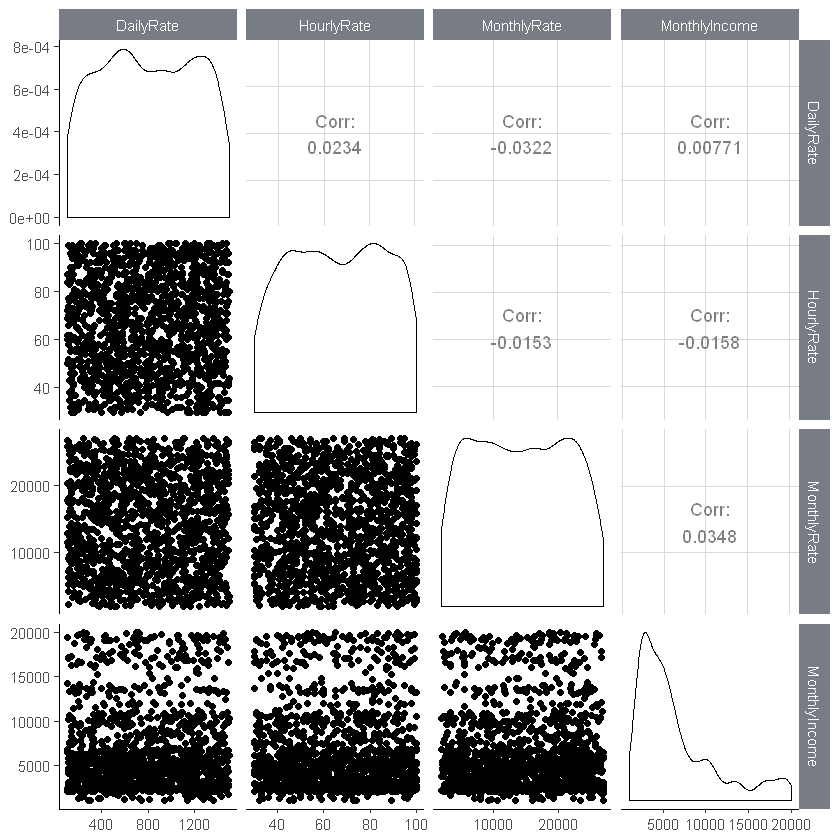

In [22]:
GGally::ggpairs(hr.df %>% select(ends_with("Rate"), ends_with("Income"))) + theme_basic()

**WHEREAS**, `HourlyRate`, `DailyRate`, and `MonthlyRate` are not related with one another.

**WHEREAS**, Neither are they related to `MonthlyIncome`.

**WHEREAS**, They are also uniformly distributed.

**WHEREAS**, `MonthlyIncome` has a skewed distribution.

**BE IT RESOLVED**, Use `MonthlyIncome`; ditch everything else.

In [23]:
hr.df %<>% select(-ends_with("Rate"))
str(hr.df)

Classes 'tbl_df', 'tbl' and 'data.frame':	1470 obs. of  29 variables:
 $ Age                     : num  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Rarely",..: 2 3 2 3 2 3 2 2 3 2 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : num  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : Factor w/ 5 levels "Below College",..: 2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeNumber          : chr  "0001" "0002" "0004" "0005" ...
 $ EnvironmentSatisfaction : Factor w/ 4 levels "Low","Medium",..: 2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ JobInvolvement          : Factor w/ 4 levels "Low","Medium",..: 3 2 2 3 3 3 4 3 2 3 ...
 $

### Computer-friendly fields

In [24]:
hr.df %<>%
    mutate(
        # Logicals
        Separated = Attrition == "Yes",
        OverTime = OverTime == "Yes",
        # Percent
        SalaryHike = PercentSalaryHike / 100
    ) %>%
    select(-Attrition, -PercentSalaryHike)
str(hr.df)

Classes 'tbl_df', 'tbl' and 'data.frame':	1470 obs. of  29 variables:
 $ Age                     : num  41 49 37 33 27 32 59 30 38 36 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Rarely",..: 2 3 2 3 2 3 2 2 3 2 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : num  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : Factor w/ 5 levels "Below College",..: 2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeNumber          : chr  "0001" "0002" "0004" "0005" ...
 $ EnvironmentSatisfaction : Factor w/ 4 levels "Low","Medium",..: 2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ JobInvolvement          : Factor w/ 4 levels "Low","Medium",..: 3 2 2 3 3 3 4 3 2 3 ...
 $ JobLevel                : num  2 2 1 1 1 1 1 1 3 2 ...
 $ JobRole                 :

# Output parsed ingest

## `data01_parsed ingest.rds`

### Save to proxy

In [26]:
parsed.file <- "data01_parsed ingest.rds"
#### Save to proxy data://
parsed.filepath <- file.path(proxydata.path, parsed.file)
saveRDS(hr.df, parsed.filepath)
#### Stage to data://
drive_upload(parsed.filepath, as_id(datastage.id), parsed.file)

Local file:
  * ../Data/data01_parsed ingest.rds
uploaded into Drive file:
  * data01_parsed ingest.rds: 1DN3gt-cV3xWUONNXpdQQy58mV4ksvCvm
with MIME type:
  * application/x-gzip


### Get GDrive ID

In [28]:
#### Get ID
drive_sub_id(as_id(datastage.id), parsed.file)

[1] "1DN3gt-cV3xWUONNXpdQQy58mV4ksvCvm"